In [1]:
#plots.py
import os
import pandas
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import datetime
import math

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

def plot_ts_scatter(df, s = 75, figsize = (40, 20), save_fig = False, pp = None):
    # Create plot for every unique pair of variables
    plot_vars = list(df.keys())
    for var1 in plot_vars:
        for var2 in plot_vars:
            if var1 != var2:
                fig, ax = plt.subplots(figsize = figsize)
                # Create list of years from index
                # Year will be represented by color
                if "Year" not in df.keys():
                    df["Year"] = [int(str(ind)[:4]) for ind in df.index] 
                df.plot.scatter(x = var1, y = var2, s = s, ax = ax, 
                                c = "Year", cmap = "viridis")
                # Turn the text on the x-axis so that it reads vertically
                ax.tick_params(axis='x', rotation=90)
                # Get rid of tick lines perpendicular to the axis for aesthetic
                ax.tick_params('both', length=0, which='both')
                # save image if PdfPages object was passed
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    plt.savefig("plots/" + str(plot_vars).replace("[", "").replace("]","")[:40] + " scatter.png",
                            bbox_inches = "tight")
                    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    # If no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = False)
    if legend:
        ax.legend(bbox_to_anchor = (1,1))
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["2 Y (%)"] < df["1 M (%)"],
                    facecolor='red', alpha=0.2, transform = trans)
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

In [2]:
data_codes  = {#"IOER (%)":"IOER",
              "30 Y (%)": "DGS30",
              "EFFR (%)": "DFF",
              "1 M (%)": "DGS1MO",
              "3 M (%)": "DGS3MO",
              "6 M (%)": "DGS6MO",               
              "1 Y (%)": "DGS1",
              "2 Y (%)": "DGS2",
              "3 Y (%)": "DGS3",
              "5 Y (%)": "DGS5",
              "7 Y (%)": "DGS7",
              "10 Y (%)": "DGS10",
              "20 Y (%)": "DGS20",
#               "Expected Inflation (%)":"T10YIE",
#               "Inflation (%)": "CPIAUCSL"
}
               
# Select start and end dates
start = datetime.datetime(1983, 1, 1)
end = datetime.datetime.today()

# freq refers to data frequency. Choose "D", "W", "M", "Q", "A"
# a number may also be place in front of a letter. "2D" indicates
#       alternating days
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M").dropna()
#data["30 Y - 1 M"] = data["30 Y (%)"].add(-1 * data["1 M (%)"])


In [3]:
data.dropna()

,30 Y (%),EFFR (%),1 M (%),3 M (%),6 M (%),1 Y (%),2 Y (%),3 Y (%),5 Y (%),7 Y (%),10 Y (%),20 Y (%)
DATE,,,,,,,,,,,,
2001-07-31,5.613333,3.769032,3.670000,3.593333,3.556667,3.617143,4.038571,4.313333,4.761905,5.060952,5.236190,5.752857
2001-08-31,5.483478,3.652581,3.533478,3.437826,3.386522,3.470435,3.757391,4.037826,4.573913,4.843478,4.971304,5.576957
2001-09-30,5.482941,3.069000,2.675882,2.692353,2.705882,2.824706,3.118824,3.450588,4.115294,4.512353,4.731765,5.526471
2001-10-31,5.315455,2.485161,2.267273,2.197727,2.170909,2.330455,2.725909,3.136818,3.910000,4.307273,4.566818,5.339545
2001-11-30,5.118000,2.087000,1.990500,1.906500,1.924000,2.182000,2.782500,3.223500,3.972500,4.422000,4.651500,5.333000
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,3.659048,4.104194,3.899048,4.358095,4.708095,4.681905,4.288571,4.046667,3.764286,3.719048,3.616190,3.868095
2023-01-31,3.664500,4.330000,4.518500,4.687500,4.803000,4.694000,4.207500,3.913000,3.643000,3.593500,3.531500,3.810500
2023-02-28,3.802105,4.570000,4.639474,4.787895,4.965263,4.925263,4.533684,4.234211,3.942105,3.864211,3.746842,3.946316


C:\Users\JLCat\AppData\Local\Temp\ipykernel_19720\2920250242.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in vals])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_19720\2920250242.py:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in vals])


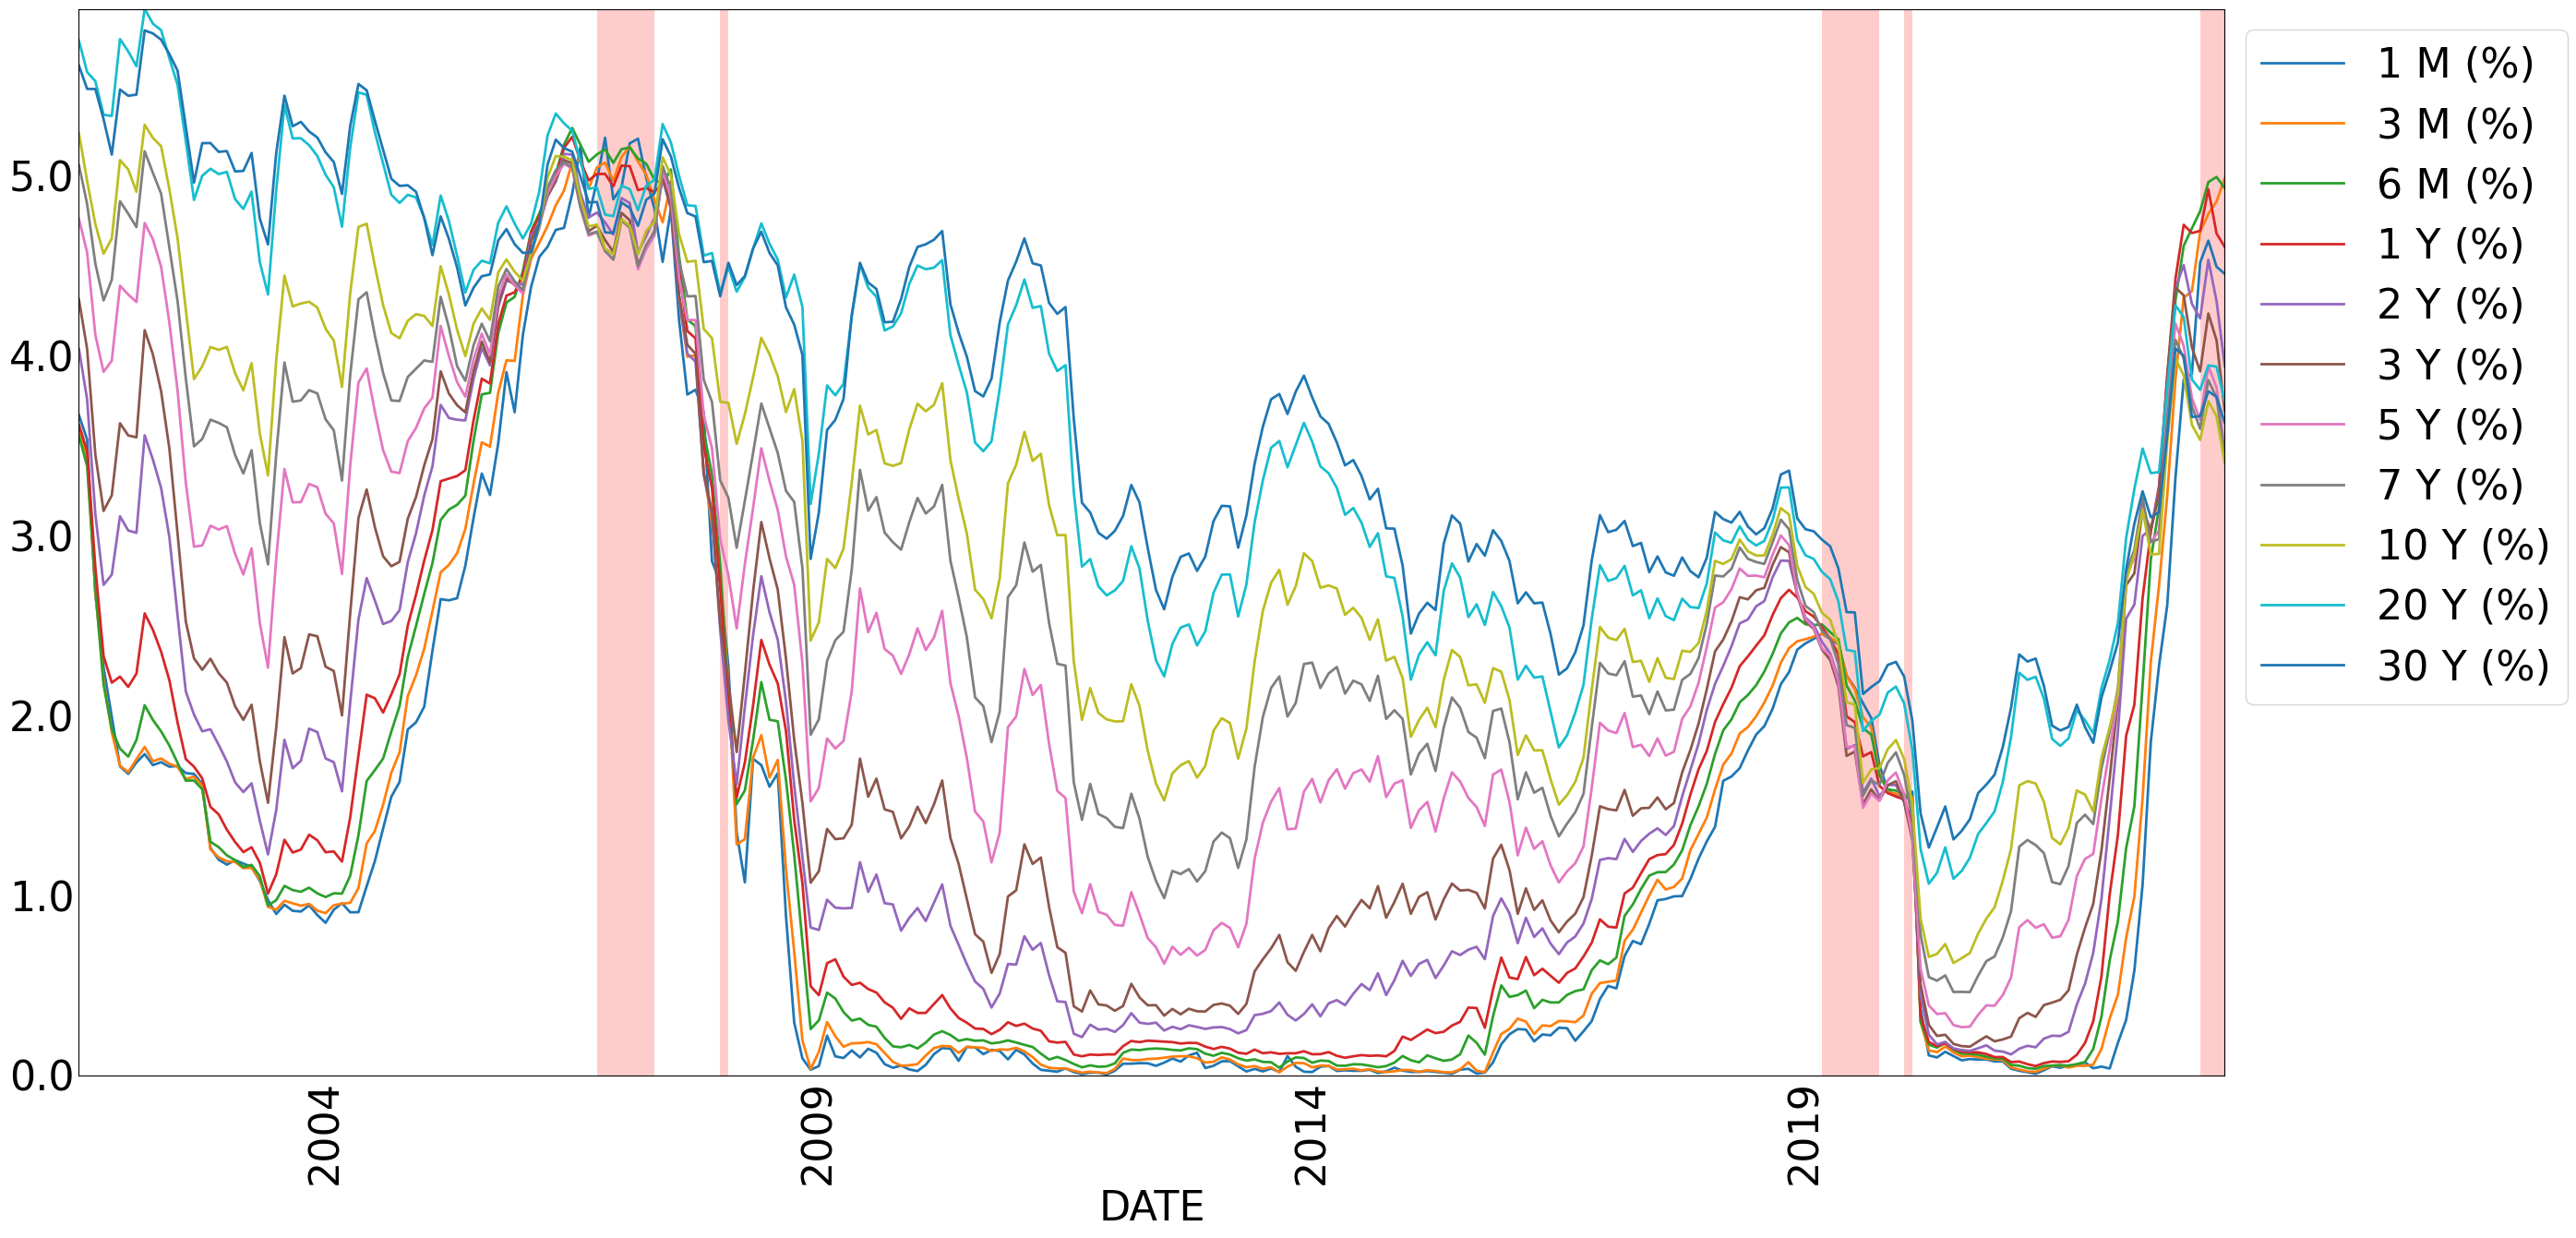

In [4]:
plt.rcParams.update({'font.size': 32})
plt.rcParams['axes.ymargin'] = 0
rate_keys = ["1 M (%)",
              "3 M (%)",
              "6 M (%)",               
              "1 Y (%)",
              "2 Y (%)",
              "3 Y (%)",
              "5 Y (%)",
              "7 Y (%)",
              "10 Y (%)",
              "20 Y (%)",
             "30 Y (%)"]

plot_lines(df = data[rate_keys], 
           linewidth = 2, figsize = (30, 15), pp = None, show_inversion = True)

C:\Users\JLCat\AppData\Local\Temp\ipykernel_19720\3920784156.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0.0, 0, '1 M (%)'),
  Text(2.0, 0, '6 M (%)'),
  Text(4.0, 0, '2 Y (%)'),
  Text(6.0, 0, '5 Y (%)'),
  Text(8.0, 0, '10 Y (%)'),
  Text(10.0, 0, '30 Y (%)')])

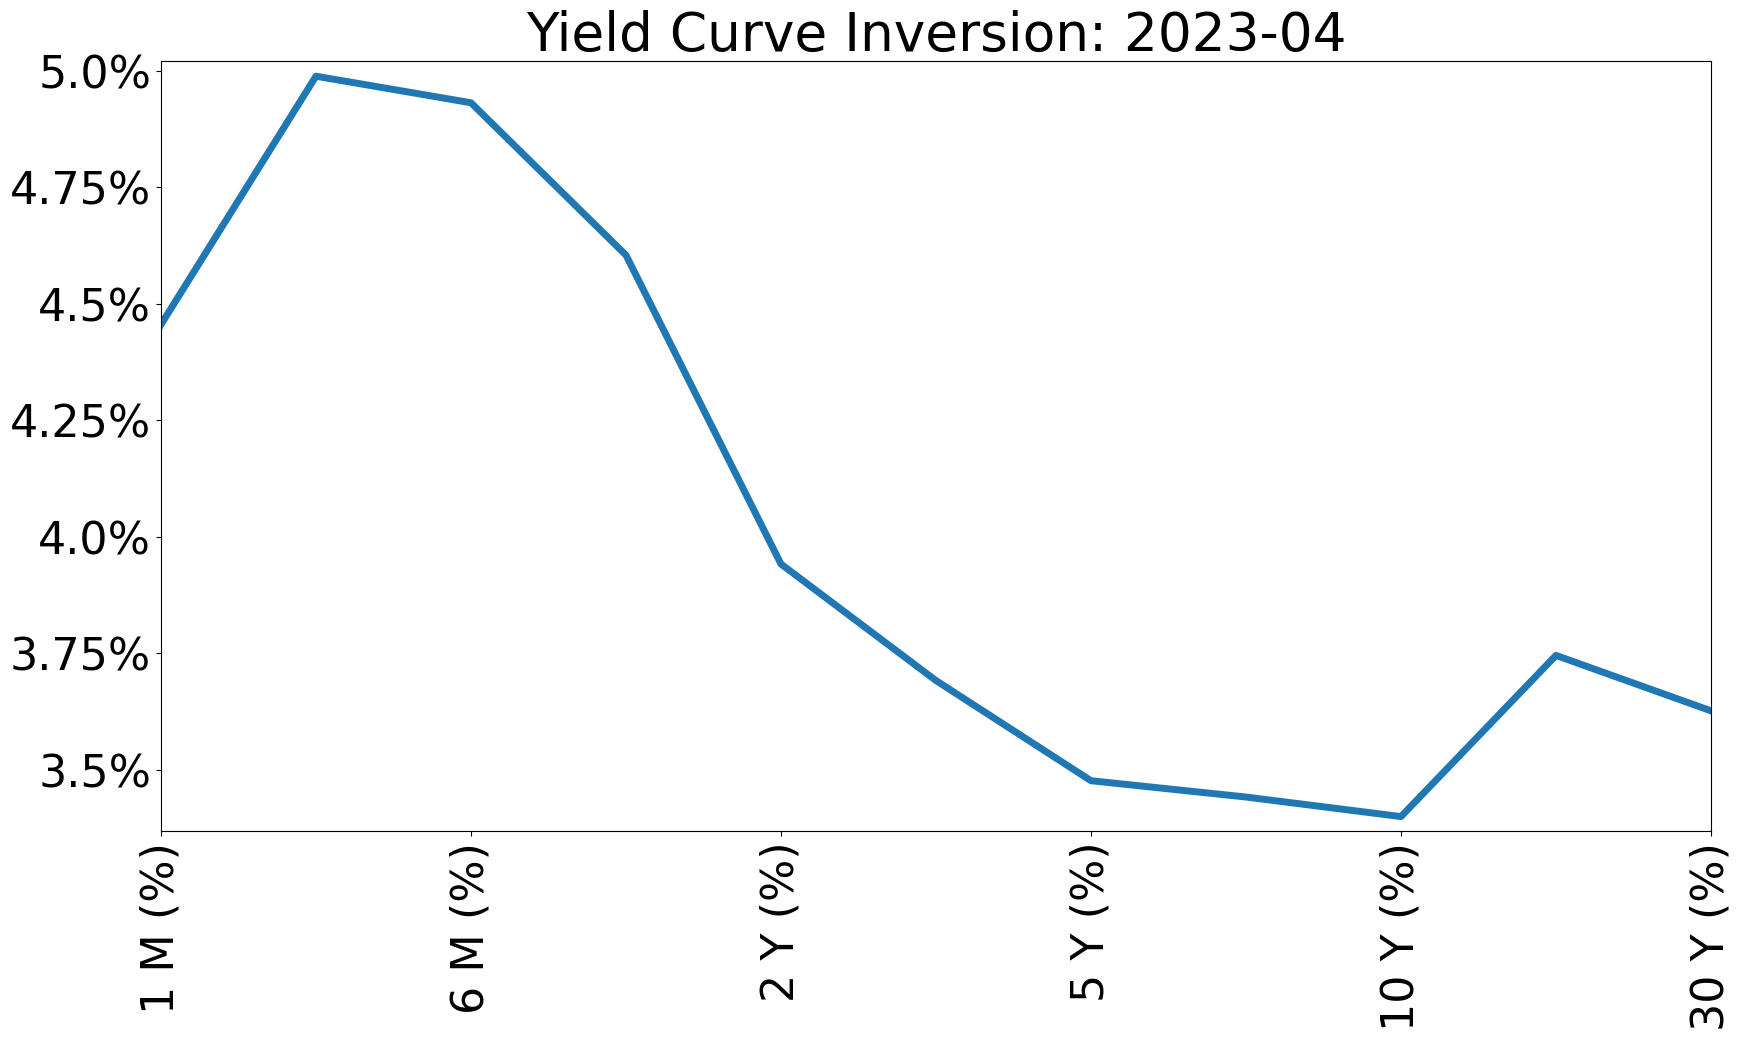

In [14]:
plt.rcParams['axes.ymargin'] = 0.02
plt.rcParams['axes.xmargin'] = 0.00
fig, ax = plt.subplots(figsize = (20,10))
data.iloc[-1][rate_keys].plot(linewidth = 5,
                              ax = ax)
ax.set_yticklabels([str(y) + "%" for y in ax.get_yticks()])
ax.set_title("Yield Curve Inversion: " + str(data.index[-1])[:7])
plt.xticks(rotation = 90)

In [6]:
plot_ts_scatter(data[["1 M (%)", "30 Y - 1 M"]], s = 75, figsize = (40, 20))

KeyError: "['30 Y - 1 M'] not in index"

In [ ]:
plot_lines(df = data[["Expected Inflation (%)","Inflation (%)"]].dropna(), title = None, h_line = 2,
           legend = True, linewidth = 1.5, figsize = (40, 20), pp = None)

In [ ]:
plot_lines(df = data[["1 M (%)", "30 Y (%)", "30 Y - 1 M"]], title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)

In [ ]:
T_data = data.T
T_data.rename(columns={name : str(name)[:10] for name in T_data.keys()}, inplace = True)
keys = list(T_data.keys())
T_data_trunc = T_data[keys[-181::60]]
max_y = T_data.max().max()
#for key, val in T_data_trunc.items():
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, figsize = (40, 20), full_index = True, pp = None)

In [ ]:
from matplotlib.animation import FuncAnimation
import math         
def plot_curves(date, *kwargs):
    #ax.clear()
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])
 
    # the FuncAnimation cycles from 0 to i frames,
    plot_df = df[date]
    alpha = 1 if date in write_dates else .1
    color = "C" + str(math.ceil(int(date[5:7])/3)) if date != write_dates[0] else "k"

    # If no secondary_y (axis), plot all variables at once

    plot_df.plot.line(linewidth = linewidth, ax = ax, alpha = alpha, color = color)
    if date in write_dates: 
        plt.text(len(plot_df.keys()) - 1, plot_df["30 Y (%)"], date[5:], color = color)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(str(date)[:10] + "\n" + "Yield Curve (U.S. Treasuries)", fontsize = 30)
    print(date)
    
def init(*kwargs):
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    plt.xticks([i for i in range(len(data.index))], list(data.index))
    ax.tick_params(axis='x', rotation=90)
    # transform y-axis values from sci notation to integers
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])

dates = list(T_data.keys())[-166:]
write_dates = dates[-1:0:-20]
df = T_data[dates].drop("30 Y - 1 M", axis = 0).drop("Expected Inflation (T10YIE)", axis = 0)
max_y = df.max().max()
fig, ax = plt.subplots(figsize=(40,20))   
plt.rcParams.update({"font.size": 30})
linewidth = 5
# the functions will unpack the tuple. The same names variable names
# are used in the function
kwargs = (df, fig, ax, max_y, linewidth, write_dates)
frames = dates
anim = FuncAnimation(fig, plot_curves, frames = frames, 
                     blit = False, init_func = init, interval=100, 
                     fargs =kwargs)
# Use the next line to save the video as an MP4.
anim.save("2020CrisisYieldCurve.mp4", writer = "ffmpeg")
plt.close()

In [ ]:
dates = list(T_data.keys())[:200]
write_dates = dates[-1:0:-20]
df = T_data[dates].drop("30 Y - 1 M", axis = 0).drop("Expected Inflation (T10YIE)", axis = 0)
max_y = df.max().max()
fig, ax = plt.subplots(figsize=(40,20))   
plt.rcParams.update({"font.size": 30})
linewidth = 5
# the functions will unpack the tuple. The same names variable names
# are used in the function
kwargs = (df, fig, ax, max_y, linewidth, write_dates)
frames = dates
anim = FuncAnimation(fig, plot_curves, frames = frames, 
                     blit = False, init_func = init, interval=100, 
                     fargs =kwargs)
# Use the next line to save the video as an MP4.
anim.save("2008CrisisYieldCurve.mp4", writer = "ffmpeg")
plt.close()